***This is a draft for a K-Means Cluster Machine!***

**Step 1: Select and import features**
* 500 participants over ~76 days (2/28/2023 - 5/14/2023) Spring 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [6]:
df = pd.read_excel('k-Means_Dataset/SP23_Efficiencies.xlsx')
df

,Participant ID,Intervention Group,#DaysOfRecordedData,First 5 Consecutive Days Position,Last 5 Consecutive Days Position,First 5 Consecutive Days MINUTES ASLEEP Mean,First 5 Consecutive Days TIME IN BED Mean,Last 5 Consecutive Days MA Mean,Last 5 Consecutive Days TIB Mean,First 5 Consecutive Days Sleep Efficiency,Last 5 Consecutive Days Sleep Efficiency,Difference in Efficiencies (last - first),Distance Between First and Last 5 Days
0,21101,2,63,"(1, 5)","(63, 67)",346.6,406.8,373.6,433.6,0.852016,0.861624,0.009608,58.0
1,21103,1,38,"(2, 6)","(25, 29)",494.6,563.2,453.2,513.6,0.878196,0.882399,0.004203,19.0
2,21104,2,50,"(3, 7)","(62, 66)",464.6,552.0,471.4,529.2,0.841667,0.890779,0.049112,28.0
3,21106,2,49,"(10, 14)","(59, 63)",402.4,475.2,440.8,485.0,0.846801,0.908866,0.062065,31.0
4,21107,2,26,"(10, 14)","(31, 35)",458.2,528.6,442.6,487.2,0.866818,0.908456,0.041638,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,22813,1,51,"(16, 20)","(60, 64)",429.2,491.8,318.0,360.8,0.872712,0.881375,0.008662,NaN
116,22910,1,50,"(13, 17)","(62, 66)",398.4,432.4,388.6,414.2,0.921369,0.938194,0.016825,NaN
117,22911,1,62,"(3, 7)","(59, 63)",447.2,503.4,376.6,415.0,0.888359,0.907470,0.019111,NaN
118,22912,1,50,"(16, 20)","(63, 67)",286.4,325.0,385.0,435.2,0.881231,0.884651,0.003420,NaN


**Step 2: Preprocess Data**
* Normalize selected feature
* Handle missing values :p

(120, 1)


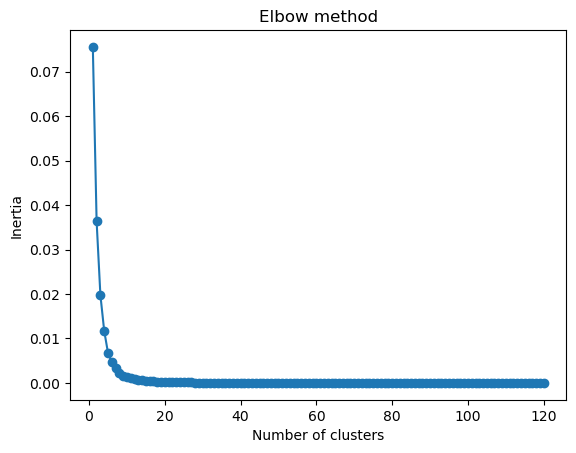

In [25]:
toList = np.array(df['First 5 Consecutive Days Sleep Efficiency'].to_list())
firstEff = toList.reshape(-1,1)
print(firstEff.shape)

inertias = []

firstEff

for i in range(1,121):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(firstEff)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,121), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Step 3: Apply K-Means clustering**
* Use the elbow method to choose K
* Run the algo to assign participants to clusters

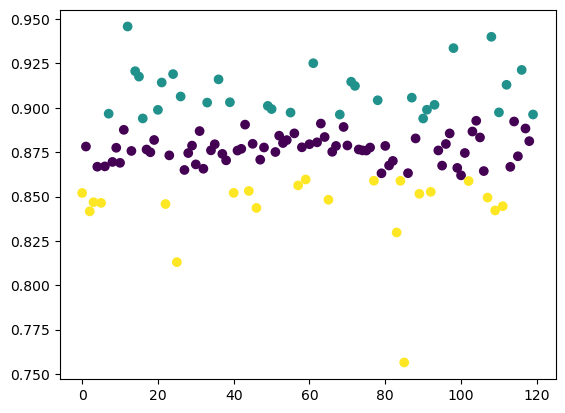

In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(firstEff)
x = np.arange(firstEff.shape[0])

plt.scatter(x, firstEff, c=kmeans.labels_)
plt.show()

**Step 4: Interpret clusters**